''' -- coding:utf-8 -- @author: Huaiyu Dong ＆ Yixing Huang @Time: 2023-10-23 @Explanition: This code aims to predict the EAB of microwave absorber structure using the SVM. '''

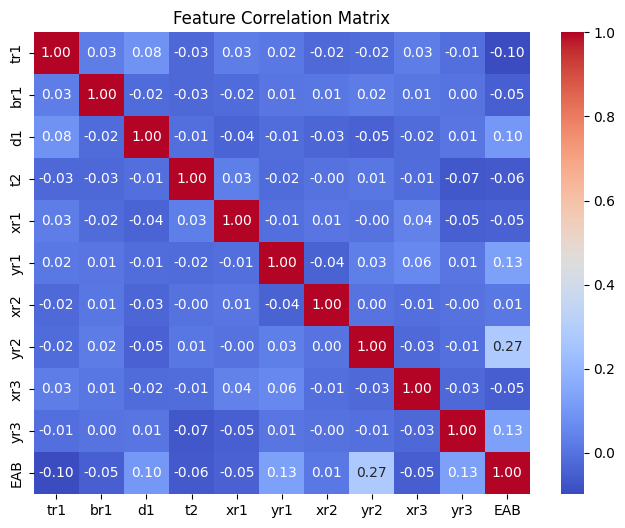

Code execution time: 0.26 seconds
Training R-squared: 0.947
Testing R-squared: 0.774
Training Mean Squared Error: 11.0792339310832979037968470947816968
Testing Mean Squared Error: 49.874


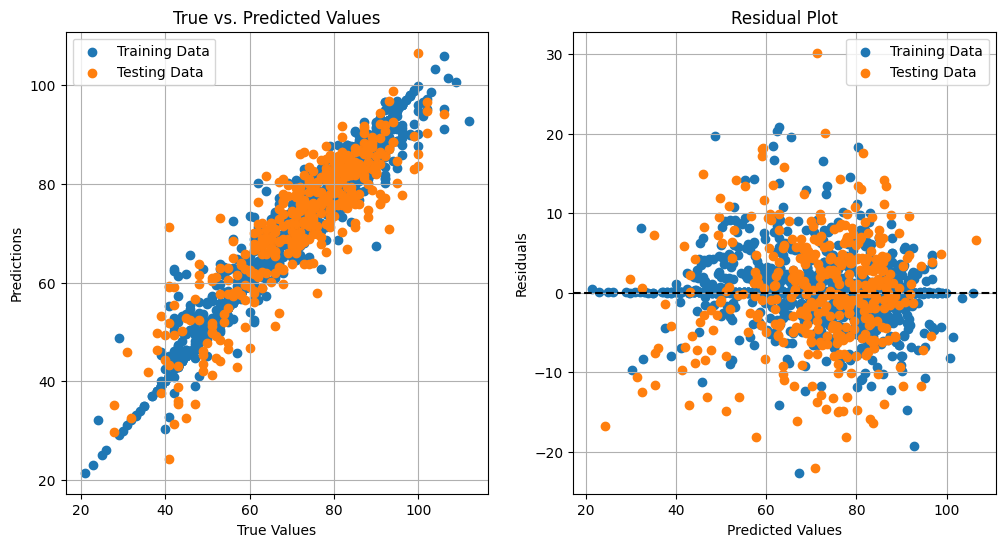

In [1]:
###SVM###
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import time

#seed = 42
# Load your data from mydata_petals.csv
data = pd.read_csv('mydata_petals.csv')

# Extract the last column (EAB) as the target variable
EAB = data.iloc[:, -1].values

# Extract the first 10 columns as input features
input = data.iloc[:, :-1].values

# Create MinMaxScaler objects for input and EAB
scaler_in = MinMaxScaler(feature_range=(-0.5, 0.5))
scaler_out = MinMaxScaler(feature_range=(-0.99, 0.99))

# Fit and transform input data
X = scaler_in.fit_transform(input)
y = scaler_out.fit_transform(EAB.reshape(-1, 1)).ravel()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#, random_state=seed

# Visualize feature correlation
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# 记录开始时间
start_time = time.time()

# Initialize and train the SVM model
svm_model = SVR(kernel='rbf', C=2, epsilon=0.001)
svm_model.fit(X_train, y_train)
# 记录结束时间
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Code execution time: {execution_time:.2f} seconds")
# Predict with the trained model
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Transform the predictions back to the original scale
y_train_pred = scaler_out.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_test_pred = scaler_out.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()
y_train_true = scaler_out.inverse_transform(y_train.reshape(-1, 1)).ravel()
y_test_true = scaler_out.inverse_transform(y_test.reshape(-1, 1)).ravel()

# Evaluate the model
train_r2 = r2_score(y_train_true, y_train_pred)
test_r2 = r2_score(y_test_true, y_test_pred)
train_mse = mean_squared_error(y_train_true, y_train_pred)
test_mse = mean_squared_error(y_test_true, y_test_pred)

print(f"Training R-squared: {train_r2:.3f}")
print(f"Testing R-squared: {test_r2:.3f}")
print(f"Training Mean Squared Error: {train_mse:.34f}")
print(f"Testing Mean Squared Error: {test_mse:.3f}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.scatter(y_train_true, y_train_pred, label='Training Data')
plt.scatter(y_test_true, y_test_pred, label='Testing Data')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.title('True vs. Predicted Values')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_train_pred, y_train_pred - y_train_true, label='Training Data')
plt.scatter(y_test_pred, y_test_pred - y_test_true, label='Testing Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.legend()
plt.title('Residual Plot')
plt.grid(True)
plt.show()

核函数: 代码中使用了RBF核函数（径向基函数）进行支持向量回归（SVR）模型的训练，这是默认的核函数。你可以根据需要更改核函数类型，例如kernel='linear'（线性核函数）等。

软间隔: SVR模型默认支持软间隔，通过epsilon参数进行调整。在这段代码中，epsilon=0.2表示软间隔的大小。你可以根据需要调整这个值，以影响模型对误差的容忍度。

调整超参数: 代码中C=1.0表示SVM的正则化参数（惩罚项），这是控制间隔的宽度的超参数。你可以根据数据和模型的性能需求来调整这个参数。通常，较小的C值表示更大的间隔，但可能会容忍更多的误差，较大的C值表示更严格的拟合，但可能导致过拟合。

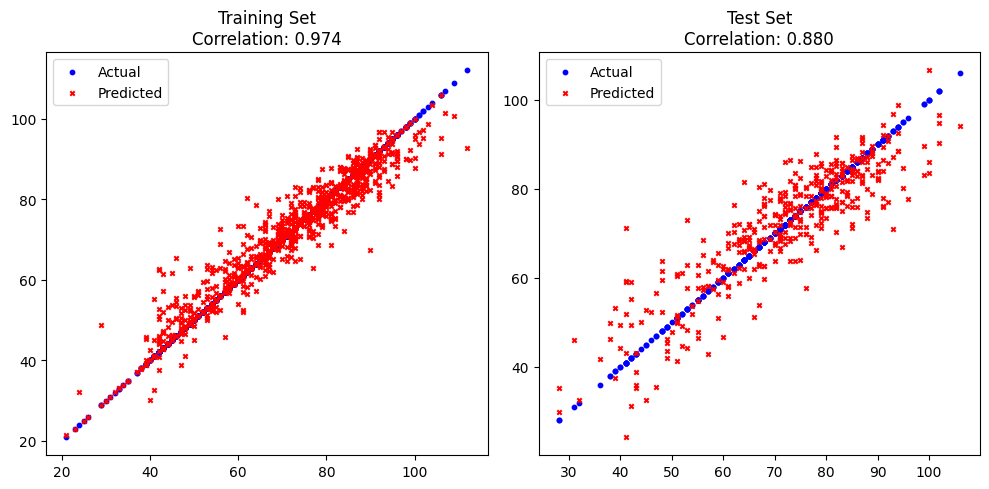

In [2]:
# Additional code to plot correlation
actual_train = y_train_true
predicted_train = y_train_pred
actual_test = y_test_true
predicted_test = y_test_pred

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot of actual values and regression line for training set
axes[0].scatter(actual_train, actual_train, color='blue', label='Actual', marker='o', s=10)
axes[0].scatter(actual_train, predicted_train, color='red', label='Predicted', marker='x', s=10)
#axes[0].set_xlim(-1.2, 1.2)
#axes[0].set_ylim(-1.2, 1.2)
correlation_train = np.corrcoef(actual_train, predicted_train, rowvar=False)[0, 1]
axes[0].set_title(f'Training Set\nCorrelation: {correlation_train:.3f}')
axes[0].legend()


# Scatter plot of actual values and regression line for test set
axes[1].scatter(actual_test, actual_test, color='blue', label='Actual', marker='o', s=10)
axes[1].scatter(actual_test, predicted_test, color='red', label='Predicted', marker='x', s=10)
#axes[1].set_xlim(-1.2, 1.2)
#axes[1].set_ylim(-1.2, 1.2)
correlation_test = np.corrcoef(actual_test, predicted_test, rowvar=False)[0, 1]
axes[1].set_title(f'Test Set\nCorrelation: {correlation_test:.3f}')
axes[1].legend()

plt.tight_layout()
plt.show()